In [136]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

%matplotlib inline
%reload_ext tensorboard


In [137]:
import datetime

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784',version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
x,y = mnist["data"],mnist["target"]

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

70000 images are present in this dataset 

lets visualize

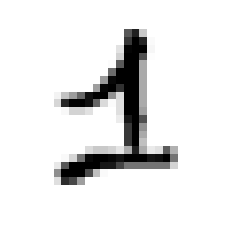

In [8]:
digit = x.to_numpy()[24]
digit_img = digit.reshape(28,28) #since each image has 784 features
plt.imshow(digit_img,cmap = "binary")
plt.axis("off")
plt.show()

lets see if the label matches the image

In [9]:
y[24]

'1'

it does

since the dataset is already split and shuffled
no neccessity to use sklearn's train_test_split

In [60]:
x_train , x_test , y_train , y_test = x[:60000],x[60000:],y[:60000],y[60000:]

# classification using simple perceptron 

was trying to fit kernelpca...laptop froze :(

In [61]:
from sklearn.linear_model import Perceptron
perc_clf = Perceptron(tol=1e-3, random_state=42)
perc_clf.fit(x_train,y_train)

Perceptron(random_state=42)

In [62]:
y_pred = perc_clf.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 943,    0,    5,    4,    4,    3,    4,    1,   13,    3],
       [   0, 1108,   16,    0,    0,    1,    3,    1,    5,    1],
       [   9,   11,  927,   13,   13,    3,   12,    7,   34,    3],
       [   7,    3,   45,  860,    1,   42,    1,   12,   22,   17],
       [   1,    1,   10,    1,  859,    1,    3,    1,    9,   96],
       [  12,    3,   11,   27,   10,  766,   15,    7,   31,   10],
       [  10,    3,   15,    4,    4,   17,  901,    0,    4,    0],
       [   0,    9,   17,   11,    4,    1,    1,  904,    3,   78],
       [   6,   22,   38,   32,   11,   77,    8,   13,  695,   72],
       [   6,    5,    2,   10,   24,   10,    0,   18,    5,  929]],
      dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

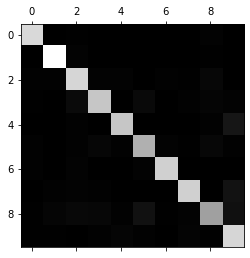

In [65]:
plt.matshow(cm,cmap = plt.cm.gray)
plt.show

we have 10 rows and 10 columns (0 to 9)

In [53]:
y_test[60004]

'4'

In [54]:
y_pred[4]

'4'

In [55]:
y_test_new = y_test.to_numpy()
y_test_new.reshape(1,-1)

array([['7', '2', '1', ..., '4', '5', '6']], dtype=object)

In [56]:
y_pred = y_pred.reshape(1,-1)

In [57]:
perc_clf.score(x_train,y_train)

0.8921166666666667

good training overall

# classification using MLPs/NNs

In [66]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state= 42, max_iter=300)
mlp_clf.fit(x_train,y_train)

MLPClassifier(max_iter=300, random_state=42)

here, the standard sklearns nn does not provide the acc over each epochs 
hence it is better to use more powerful apis such as keras where we can use gpus to improve the model train time 

In [68]:
mlp_clf.score(x_train,y_train)

0.9908

since we used a powerful approach on such a trivial problem...(basic) the model seems to have learned a lot...almost overfitted
as expected as mlp > perceptron

In [72]:
y_pred = mlp_clf.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 958,    0,    1,    1,    2,    4,    3,    3,    4,    4],
       [   1, 1117,    2,    3,    0,    3,    0,    0,    8,    1],
       [   5,    5,  995,    6,    7,    0,    2,    6,    4,    2],
       [   1,    0,    5,  970,    1,   13,    0,    4,    2,   14],
       [   1,    2,    4,    0,  949,    0,    2,    1,    2,   21],
       [   1,    2,    0,   13,    1,  859,    2,    1,    7,    6],
       [   5,    4,    0,    0,    3,   11,  929,    0,    3,    3],
       [   0,    7,   13,    9,    3,    0,    0,  981,    4,   11],
       [   0,    3,    5,   18,    1,   12,    6,    6,  907,   16],
       [   3,    5,    1,   12,    8,    3,    0,    2,    4,  971]],
      dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

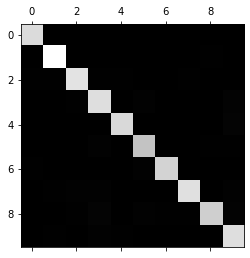

In [74]:
plt.matshow(cm,cmap = plt.cm.gray)
plt.show

aas we can see we got lot off zeros in the cm
which means the model can distinguish the digits with human level accuaracy with very small error

# using APIs (keras)

In [76]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


here we can see that one gpu is available and is ready to be used

In [77]:
mnist = keras.datasets.mnist

In [80]:
(x_train_all,y_train_all),(x_test,y_test) = mnist.load_data()

In [81]:
x_train.shape

(60000, 28, 28)

one important diff from loading dataset from sklearn and keras is every image is represented as 28 X 28 array rather than 1D array of 784 features

creating val set

In [97]:
x_valid,x_train = x_train_all[:5000] / 255.0, x_train_all[5000:] / 255.0
y_valid , y_train = y_train_all[:5000],y_train_all[5000:]

In [98]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [99]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense((256),activation = "relu")) #sigmoid can be used for such a simple problem...but rectifier does perform better and is the standard nowadays
model.add(keras.layers.Dense((64),activation = "relu"))
model.add(keras.layers.Dense((12),activation = "softmax")) #we use softmax instead of sigmoid as sigmoid is a bianry function(outputs prob) and softmax outputs the prob of being in a multiclass model

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 12)                780       
Total params: 218,188
Trainable params: 218,188
Non-trainable params: 0
_________________________________________________________________


here the first layer has 784 X 256 weights and 256 biases

model has a great flexibility to fit the train data

looking at weights and biases assigned

In [101]:
model.layers

In [102]:
hidden1 = model.layers[1] #first hidden layer
hidden1.name


'dense_4'

In [103]:
weights , biases = hidden1.get_weights()

In [104]:
weights

array([[ 0.0387727 ,  0.05592507,  0.05546413, ..., -0.01494284,
         0.05000637, -0.02783402],
       [-0.01343423,  0.06128719,  0.02866071, ..., -0.07392792,
         0.05432893,  0.00429253],
       [ 0.01884107, -0.04745711, -0.01686123, ..., -0.0322311 ,
         0.06832585, -0.06132018],
       ...,
       [-0.04200383, -0.04912547, -0.02285286, ..., -0.07066347,
         0.02907892,  0.02741208],
       [ 0.0686208 ,  0.05221045,  0.00573625, ...,  0.04796688,
         0.00362878,  0.01557481],
       [-0.06977391,  0.01582229, -0.03272334, ..., -0.01168146,
        -0.07508255,  0.07446881]], dtype=float32)

In [105]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

we can use bias_initializer to tweak our model...but not necesasry

In [106]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) #here we assign the optimizer function,metric function and the cost function

In [107]:
fin = model.fit(x_train,y_train,epochs = 25,validation_data=(x_valid,y_valid))

Epoch 1/25
1719/1719 [==============================] - 61s 3ms/step - loss: 0.2263 - accuracy: 0.9314 - val_loss: 0.1240 - val_accuracy: 0.9644
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0927 - accuracy: 0.9717 - val_loss: 0.0824 - val_accuracy: 0.9764
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0626 - accuracy: 0.9800 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.1011 - val_accuracy: 0.9722
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0368 - accuracy: 0.9875 - val_loss: 0.0850 - val_accuracy: 0.9762
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0734 - val_accuracy: 0.9804
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0880 - val_accuracy

here val accuracy is below 99 hence not overfitted yet

as we can see...the NN model using the keras api performs way better than the sklearn NN as here we can increase the hidden layers and number of neurons in it accoirdingly
we get freedom of parameter and model tweaking as well as gpu usage

if we feel like the model is overfitted after a certain epoch...we can stop the model using keras provided functions and also can drop certain layers and neurons

saing model

In [109]:
model.save("lab11.h5")

the hdf5 format saves the entire architecture of our model

we can use callbacks and early stopping as said above to get a perfect desired model

# Using tf for Visualisation

In [140]:
logdir = "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [141]:
fin = model.fit(x_train,y_train,epochs = 7,validation_data=(x_valid,y_valid), callbacks=[tensorboard_callback]) #lets reduce the no. of epoch

Epoch 1/7
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.1794 - val_accuracy: 0.9806
Epoch 2/7
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.1735 - val_accuracy: 0.9830
Epoch 3/7
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.1839 - val_accuracy: 0.9814
Epoch 4/7
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.1759 - val_accuracy: 0.9818
Epoch 5/7
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.1906 - val_accuracy: 0.9794
Epoch 6/7
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.1900 - val_accuracy: 0.9822
Epoch 7/7
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.1598 - val_accuracy: 0.9824

In [143]:
%tensorboard --logdir logs/scalars